Import Python packages

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Import dataset

In [3]:
df = pd.read_csv("C:/Users/trung/CCDS/data/processed/df.csv")

df.head(5)

,name,year,poverty-rate,median-household-income,rent-burden,pct-white,households-threatened,eviction-filing-rate,total-crime
0,Baltimore City,2000,22.92,30078,26.9,30.96,58207.75,124.17,66791
1,Baltimore City,2001,22.92,30078,26.9,30.96,52564.67,111.08,64453
2,Baltimore City,2002,22.92,30078,26.9,30.96,57183.58,121.05,56550
3,Baltimore City,2003,22.92,30078,26.9,30.96,57039.41,116.82,49263
4,Baltimore City,2004,22.92,30078,26.9,30.96,60221.48,109.42,48314


Add a column returning value = 1 if metropolitan jurisdiction and 0 if non-metropolitan jurisdiction

In [4]:
metro_juris = ["Frederick County", "Prince George's County", "Montgomery County"]

df['metropolitan'] = df['name'].apply(lambda x: 1 if x in metro_juris else 0)

In [5]:
df.head(5)

,name,year,poverty-rate,median-household-income,rent-burden,pct-white,households-threatened,eviction-filing-rate,total-crime,metropolitan
0,Baltimore City,2000,22.92,30078,26.9,30.96,58207.75,124.17,66791,0
1,Baltimore City,2001,22.92,30078,26.9,30.96,52564.67,111.08,64453,0
2,Baltimore City,2002,22.92,30078,26.9,30.96,57183.58,121.05,56550,0
3,Baltimore City,2003,22.92,30078,26.9,30.96,57039.41,116.82,49263,0
4,Baltimore City,2004,22.92,30078,26.9,30.96,60221.48,109.42,48314,0


Univariate Analysis

In [6]:
# univariate plot columns
uni_plot_cols = df[['poverty-rate', 'median-household-income', 'rent-burden', 'pct-white', 'households-threatened', 'eviction-filing-rate', 'total-crime']]

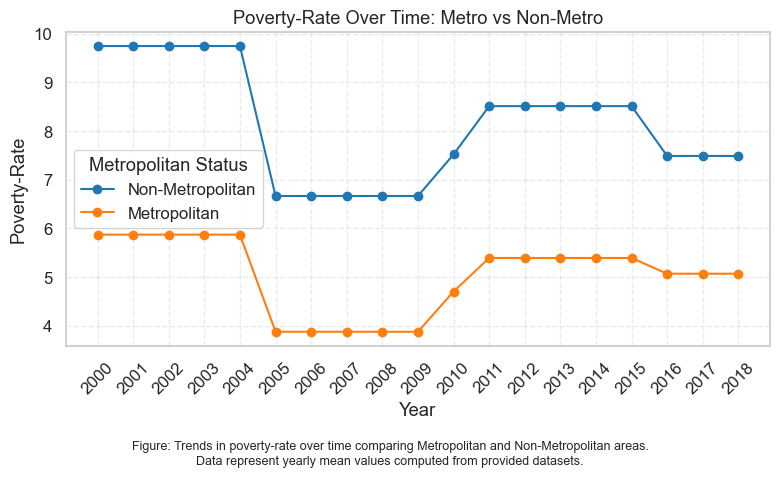

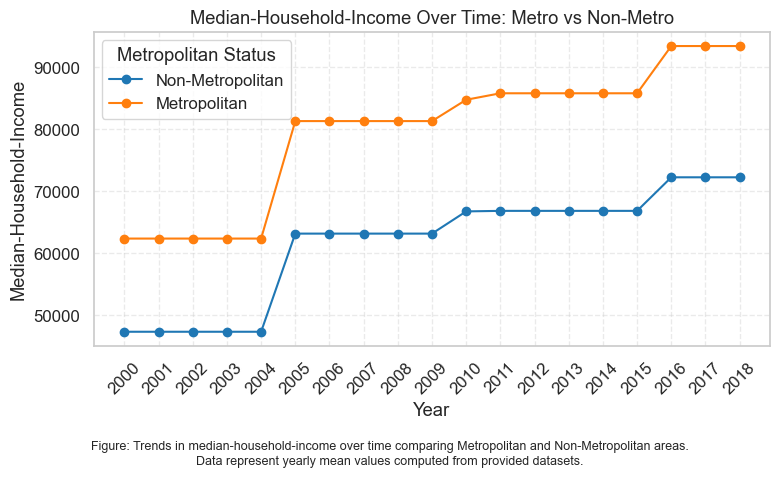

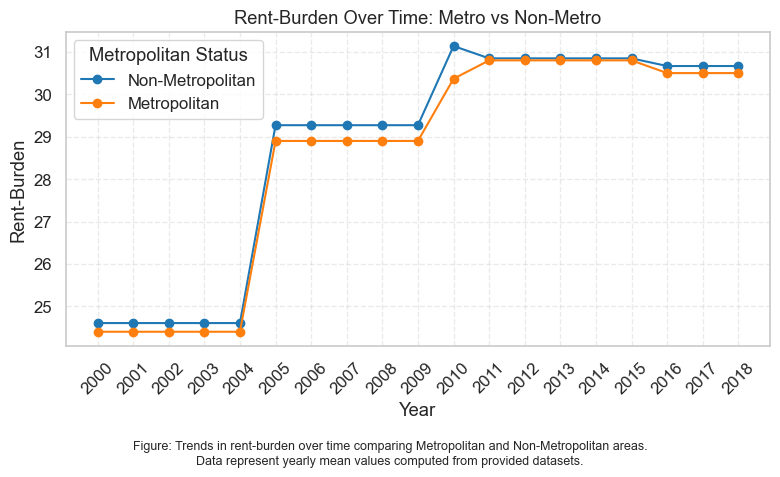

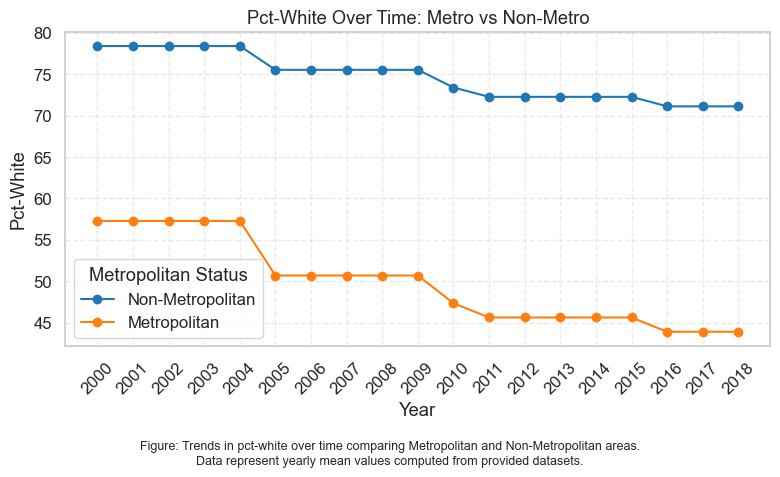

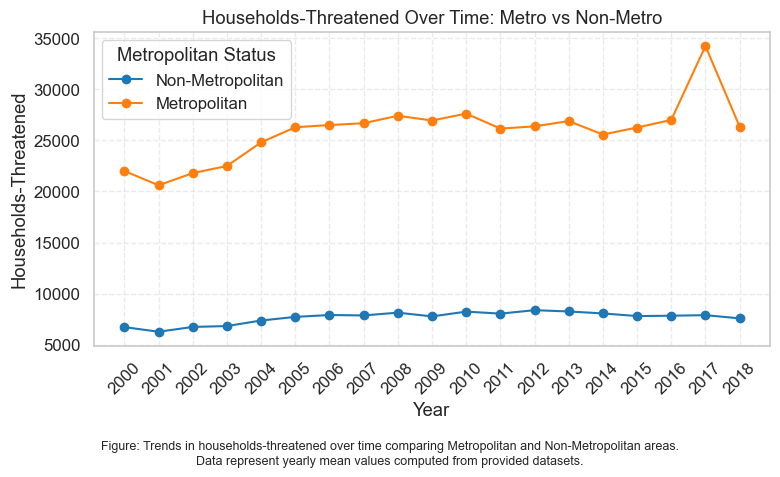

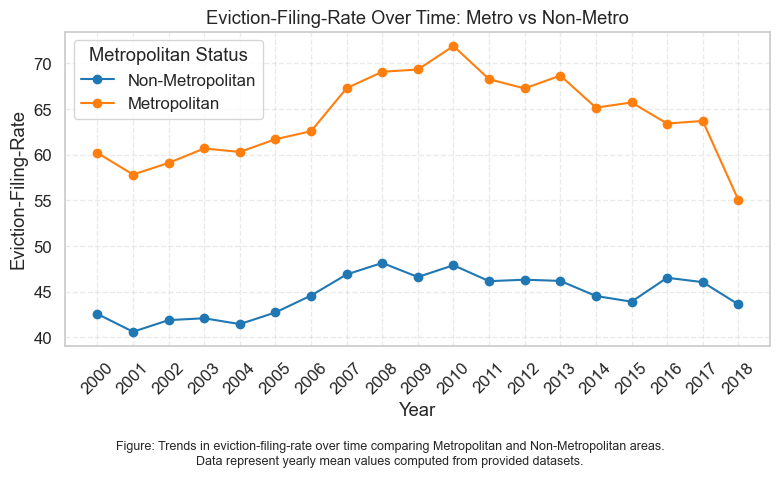

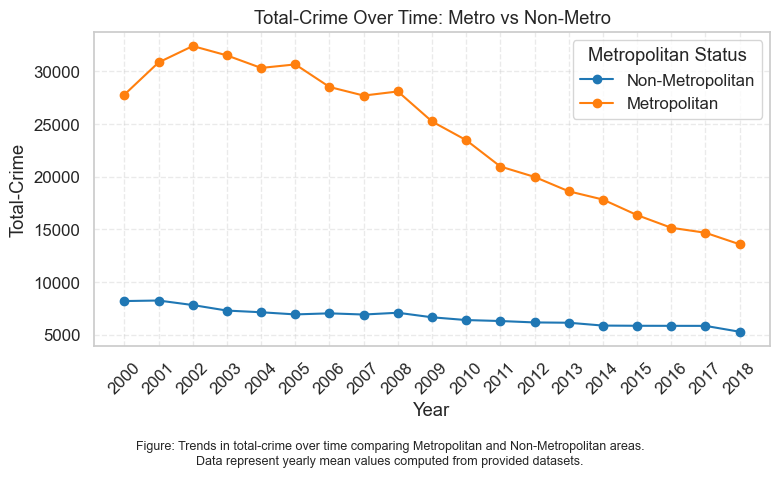

In [12]:
# plot each variable's mean grouped by metropolitan group and year over time
for col in uni_plot_cols:
    # Compute yearly mean by group
    agg = df.groupby(["year", "metropolitan"], as_index=False, dropna=True)[col].mean().reset_index()

    plt.figure(figsize=(8, 4.5))

    # Define consistent colors
    colors = {0: "#1f77b4", 1: "#ff7f0e"}  # 0 = Non-Metropolitan (blue), 1 = Metropolitan (orange)

    # Plot for each group
    for group_name, data in agg.groupby("metropolitan"):
        plt.plot(
            data["year"], 
            data[col], 
            marker="o", 
            label="Metropolitan" if group_name == 1 else "Non-Metropolitan",
            color=colors[group_name]
        )

    # Formatting
    plt.title(f"{col.replace('_', ' ').title()} Over Time: Metro vs Non-Metro")
    plt.xlabel("Year")
    plt.ylabel(col.replace('_', ' ').title())
    plt.legend(title='Metropolitan Status', loc='best')
    plt.grid(True, linestyle="--", alpha=0.4)
    plt.xticks(agg["year"].unique().astype(int), rotation=45)  # Force whole number years
    plt.tight_layout()

    # Caption
    caption = (
        f"Figure: Trends in {col.replace('_', ' ')} over time comparing Metropolitan and Non-Metropolitan areas.\n"
        f"Data represent yearly mean values computed from provided datasets."
    )
    plt.figtext(0.5, -0.05, caption, wrap=True, ha='center', fontsize=9)


Bivariate Analysis

In [8]:
# bivariate plot cols: don't include eviction filing rate
bi_plot_cols = df[['poverty-rate', 'median-household-income', 'rent-burden', 'pct-white', 'households-threatened', 'total-crime']]

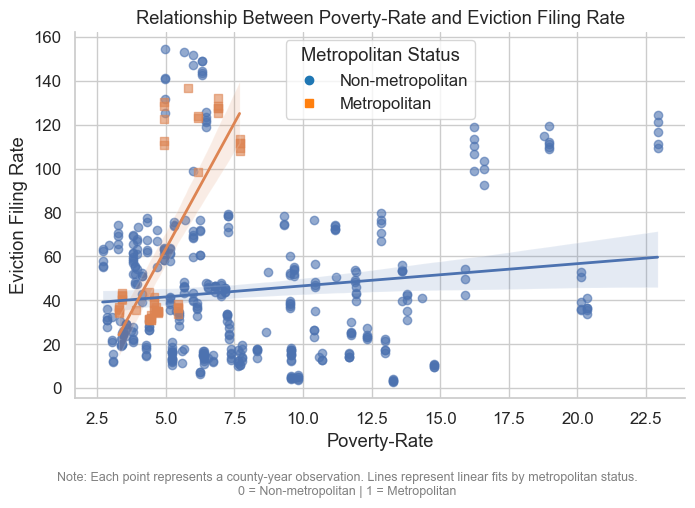

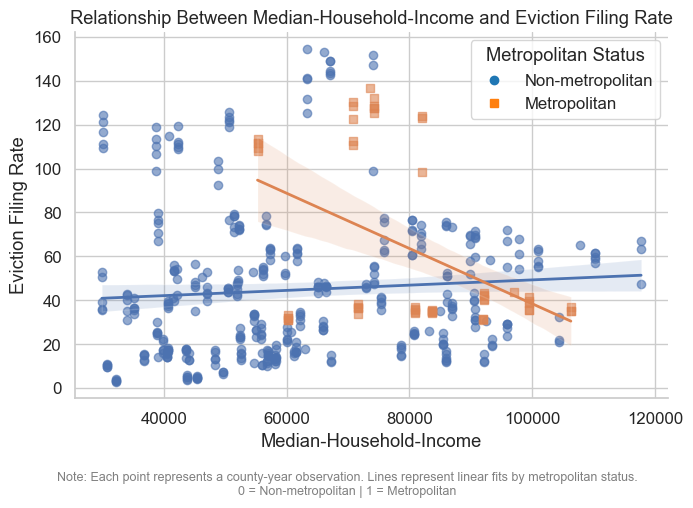

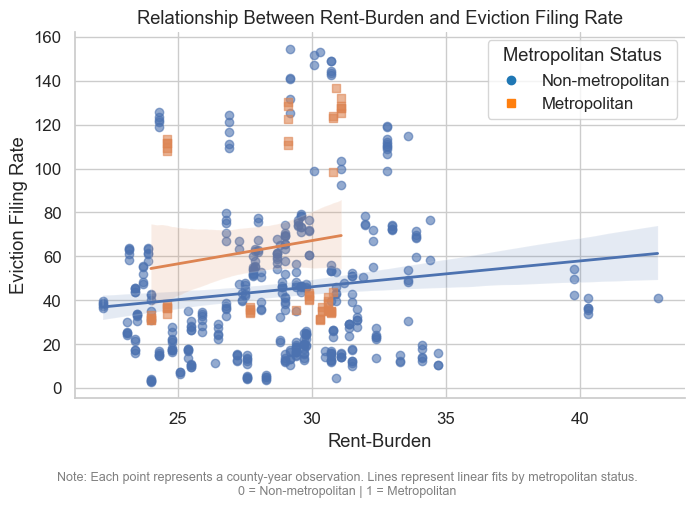

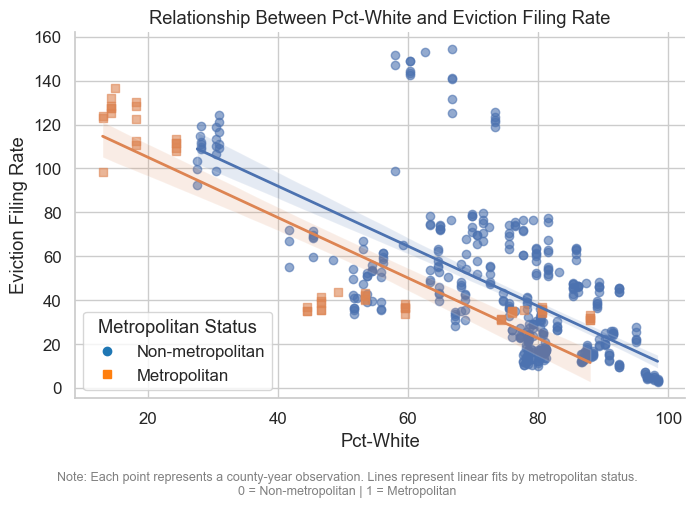

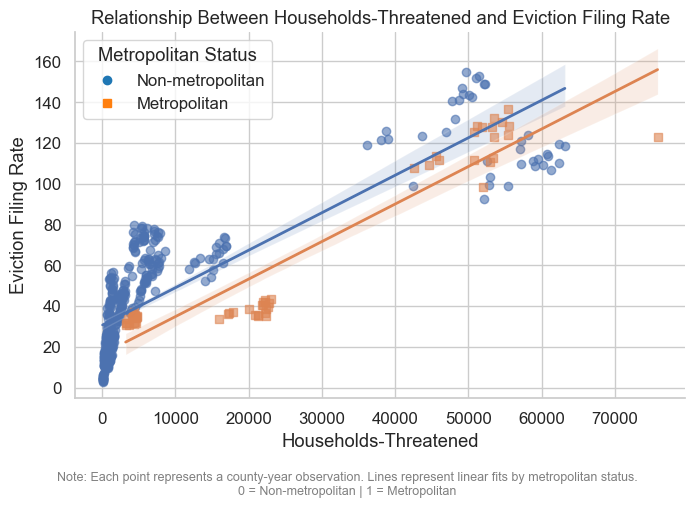

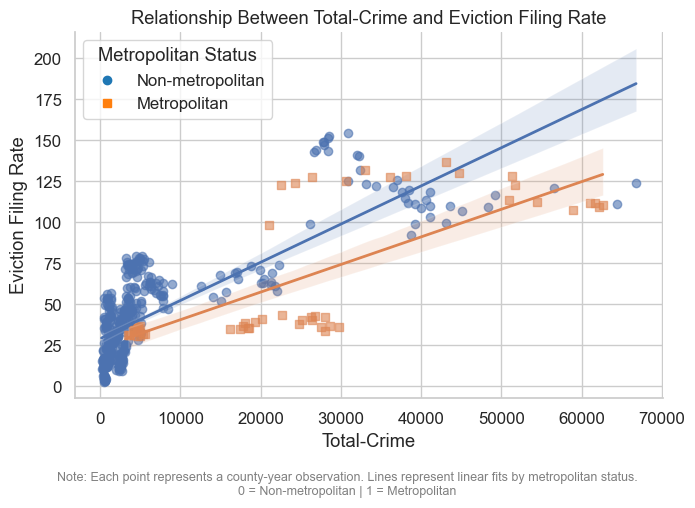

In [9]:
# Set Seaborn style
sns.set(style="whitegrid", font_scale=1.1)

# Create scatter plots with regression lines for each independent variable
for col in bi_plot_cols:
    g = sns.lmplot(
        x=col,
        y="eviction-filing-rate",
        hue="metropolitan",
        data=df,
        aspect=1.2,
        height=5,
        scatter_kws={"alpha": 0.6},
        line_kws={"linewidth": 2},
        markers=["o", "s"]
    )

    plt.xlabel(col.replace("_", " ").title())
    plt.ylabel("Eviction Filing Rate")
    plt.title(f"Relationship Between {col.replace('_', ' ').title()} and Eviction Filing Rate")
    plt.suptitle("")  # Removes automatic Seaborn supertitle

  # Remove default legend
    g._legend.remove()

    # Add custom legend
    plt.legend(
        handles=[
            plt.Line2D([], [], marker='o', color='#1f77b4', linestyle='', label='Non-metropolitan'),
            plt.Line2D([], [], marker='s', color='#ff7f0e', linestyle='', label='Metropolitan')
        ],
        title="Metropolitan Status",
        loc="best"
    )

    plt.figtext(
        0.5, -0.05,
        "Note: Each point represents a county-year observation. Lines represent linear fits by metropolitan status.\n"
        "0 = Non-metropolitan | 1 = Metropolitan",
        ha="center", fontsize=9, color="gray"
    )

    plt.tight_layout()
    plt.show()